# Analyze next-gen sequencing data using Toolchest

This notebook takes one 16S sample from an Illumina MiSeq run, runs it through Kraken 2 on Toolchest, and plots a rough sketch of the microbial composition of the sample.

Time to run: ~3 minutes

_Data from "US Immigration Westernizes the Human Gut Microbiome" (Vangay et. al, 2018) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6498444/)_

In [1]:
import matplotlib.pyplot as plt
import toolchest_client as toolchest
import pandas as pd

In [2]:
# If you don't have a key yet, you can get one for free at trytoolchest.com
toolchest.set_key("YOUR_KEY_HERE")

In [3]:
# Run Kraken 2 in the cloud – for taxonomic classification – via Toolchest
toolchest.kraken2(
    read_one="./ERR2836366_1.fastq",
    read_two="./ERR2836366_2.fastq",
    output_path="./output/",
)

Beginning Toolchest analysis run.
Processing tool_args as:
	--paired
Found 2 files to upload.
Spawning job #1...
Uploading ERR2836366_1.fastq
Finished spawning jobs.
Uploading ERR2836366_2.fastq00:00 | 1 job uploading                                                                    
Running 1 job | Duration: 0:02:40 | 1 job complete                                                                     
Checking output...

Your Toolchest run is complete! The run ID and output locations are included in the return.

If you need to re-download the results, run download(run_id="92f96488-f570-48c4-908f-cfa059a05b99") within 7 days



{'s3_uri': 's3://toolchest-internal-egress/92f96488-f570-48c4-908f-cfa059a05b99/output.tar.gz', 'output_path': ['/Users/noahlebovic/code/getting-started-python-jupyter/output/kraken2_output.txt', '/Users/noahlebovic/code/getting-started-python-jupyter/output/kraken2_summary.txt', '/Users/noahlebovic/code/getting-started-python-jupyter/output/kraken2_report.txt'], 'run_id': '92f96488-f570-48c4-908f-cfa059a05b99'}

## Plot results using pandas

Uncomment the ranks below that you'd like to plot! If you want to tweak the plots, you can expand using the "..." icon below

In [6]:
ranks = {
#     "P": "Phylum",
#     "C": "Class",
#     "O": "Order",
#     "F": "Family",
    "G": "Genus",
#     "S": "Species"
}

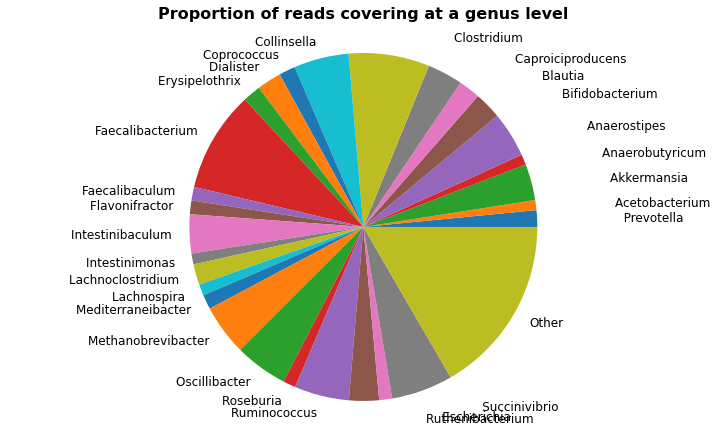

In [7]:
kraken2_report = pd.read_csv(
    './output/kraken2_report.txt',
    names=['% coverered', '# covered', '# assigned', 'Rank code', 'Taxa ID', 'Name'],
    sep='\t')
rank_codes = set(kraken2_report['Rank code'].tolist())
for rank in ranks.keys():
    df_by_rank = kraken2_report.loc[kraken2_report['Rank code'] == rank].copy()
    df_by_rank.loc[df_by_rank['# covered'] < 200, 'Name'] = 'Other'
    df_by_rank = df_by_rank.groupby("Name")["# covered"].sum().reset_index()
    df_by_rank.plot.pie(
        y="# covered",
        labels=df_by_rank["Name"],
        legend=False,
        ylabel='',
        radius=2,
        figsize=(4,4),
        textprops = dict(
            rotation_mode = 'anchor',
            va='center',
            fontsize=12,
            weight='light',
            family='sans-serif',
        )
    )
    plt.title(
        f"Proportion of reads covering at a {ranks[rank].lower()} level",
        fontsize = 16,
        weight="bold",
        pad=100
    )

## That's it! You can download and run this notebook on your computer, too

Toolchest moves execution of intense bioinformatics software to the cloud. That means you can download this Jupyter notebook and run it on your computer – or wherever you run Python.

You can download this notebook at [https://github.com/trytoolchest/getting-started-python-jupyter](https://github.com/trytoolchest/getting-started-python-jupyter)